In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
%matplotlib inline

In [333]:
df = pd.read_csv('data.csv')
df.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

In [334]:
#df.info()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Drop the last column because it only has missing values

In [335]:
df.drop(columns=['Unnamed: 32'], inplace=True)

# Create a Series containig the target

In [336]:
target_df = df.iloc[:,0].copy()
target_df[:]=0
target_df[df.diagnosis=="M"]=1

# Create a dataframe with only the feature values

In [337]:
features_df = df.iloc[:,2:]

# Feature Selection
1. Create a dataframe with the correlations between the features and the target

Text(0.5, 1.0, 'Feature-Target Correlation')

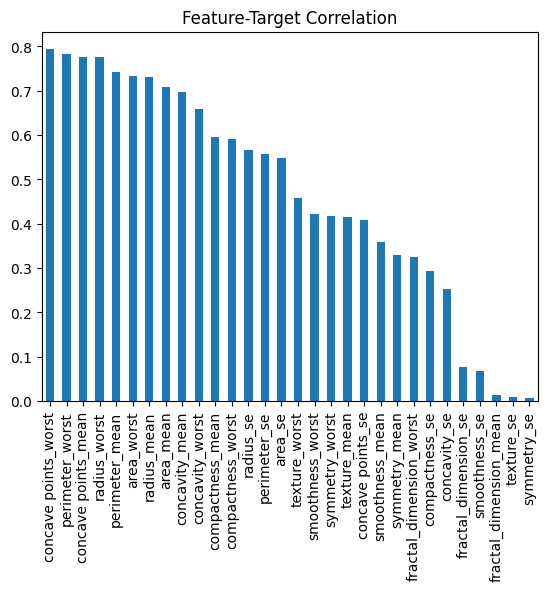

In [338]:
feat_target_corr_df = features_df.iloc[0,:].copy()
feat_target_corr_df.iloc[:] = 0

for feat_name in feat_target_corr_df.index:
    corr_coeff = np.corrcoef(features_df[feat_name].to_numpy(), target_df.to_numpy())[0,1]
    feat_target_corr_df[feat_name] = np.abs(corr_coeff)
feat_target_corr_df.sort_values(ascending=False, inplace=True)
feat_target_corr_df.plot(kind='bar').set_title("Feature-Target Correlation")

2. Create a dataframe with the correlation matrix from the features

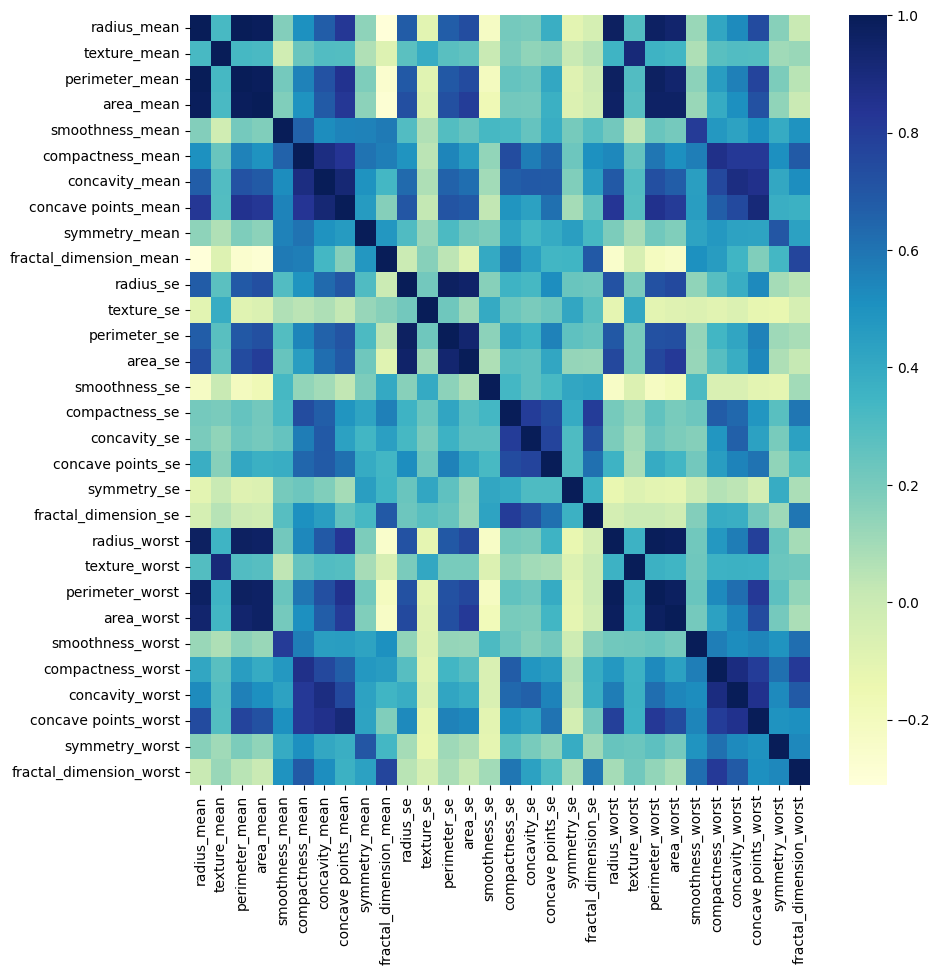

In [339]:
feat_feat_corr_mat_df = features_df.corr()
# plotting correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(feat_feat_corr_mat_df, cmap="YlGnBu", annot=False)
plt.show() 

# Traverse the features from highest to lowest correlation with the target.
- The relevant features are those showing a correlation with the target of 0.5 or higher
- The non-redundant features are those whose correlation with their upper neighbour is lower than 0.5 

In [340]:
selected_features = []
for idx, feat_name in enumerate(feat_target_corr_df.index):
    # Condition selecting only relevant features
    if feat_target_corr_df[feat_name] > 0.3:
        if idx==0:
            selected_features.append(feat_name)
        else:
            prev_feat_name = feat_target_corr_df.index[idx-1]
            last_two_cc = feat_feat_corr_mat_df.loc[prev_feat_name, feat_name]

            # Condition selecting only non-redundant features
            if last_two_cc < 0.7:
                selected_features.append(feat_name)
                
print(selected_features)

['concave points_worst', 'concavity_mean', 'radius_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst']


# Create a dataframe with the selected feature set, normalize the features and add the target to the dataframe

In [341]:
sel_feats_df = features_df.loc[:,selected_features]
for feat_name in sel_feats_df.columns:
    print(feat_name)
    sel_feats_df[feat_name] = (sel_feats_df[feat_name]-sel_feats_df[feat_name].mean())/sel_feats_df[feat_name].std()

sel_feats_df['diagnosis'] = target_df

concave points_worst
concavity_mean
radius_se
texture_worst
smoothness_worst
symmetry_worst
texture_mean
concave points_se
smoothness_mean
symmetry_mean
fractal_dimension_worst


In [342]:
# Create the pair plot for the selected features

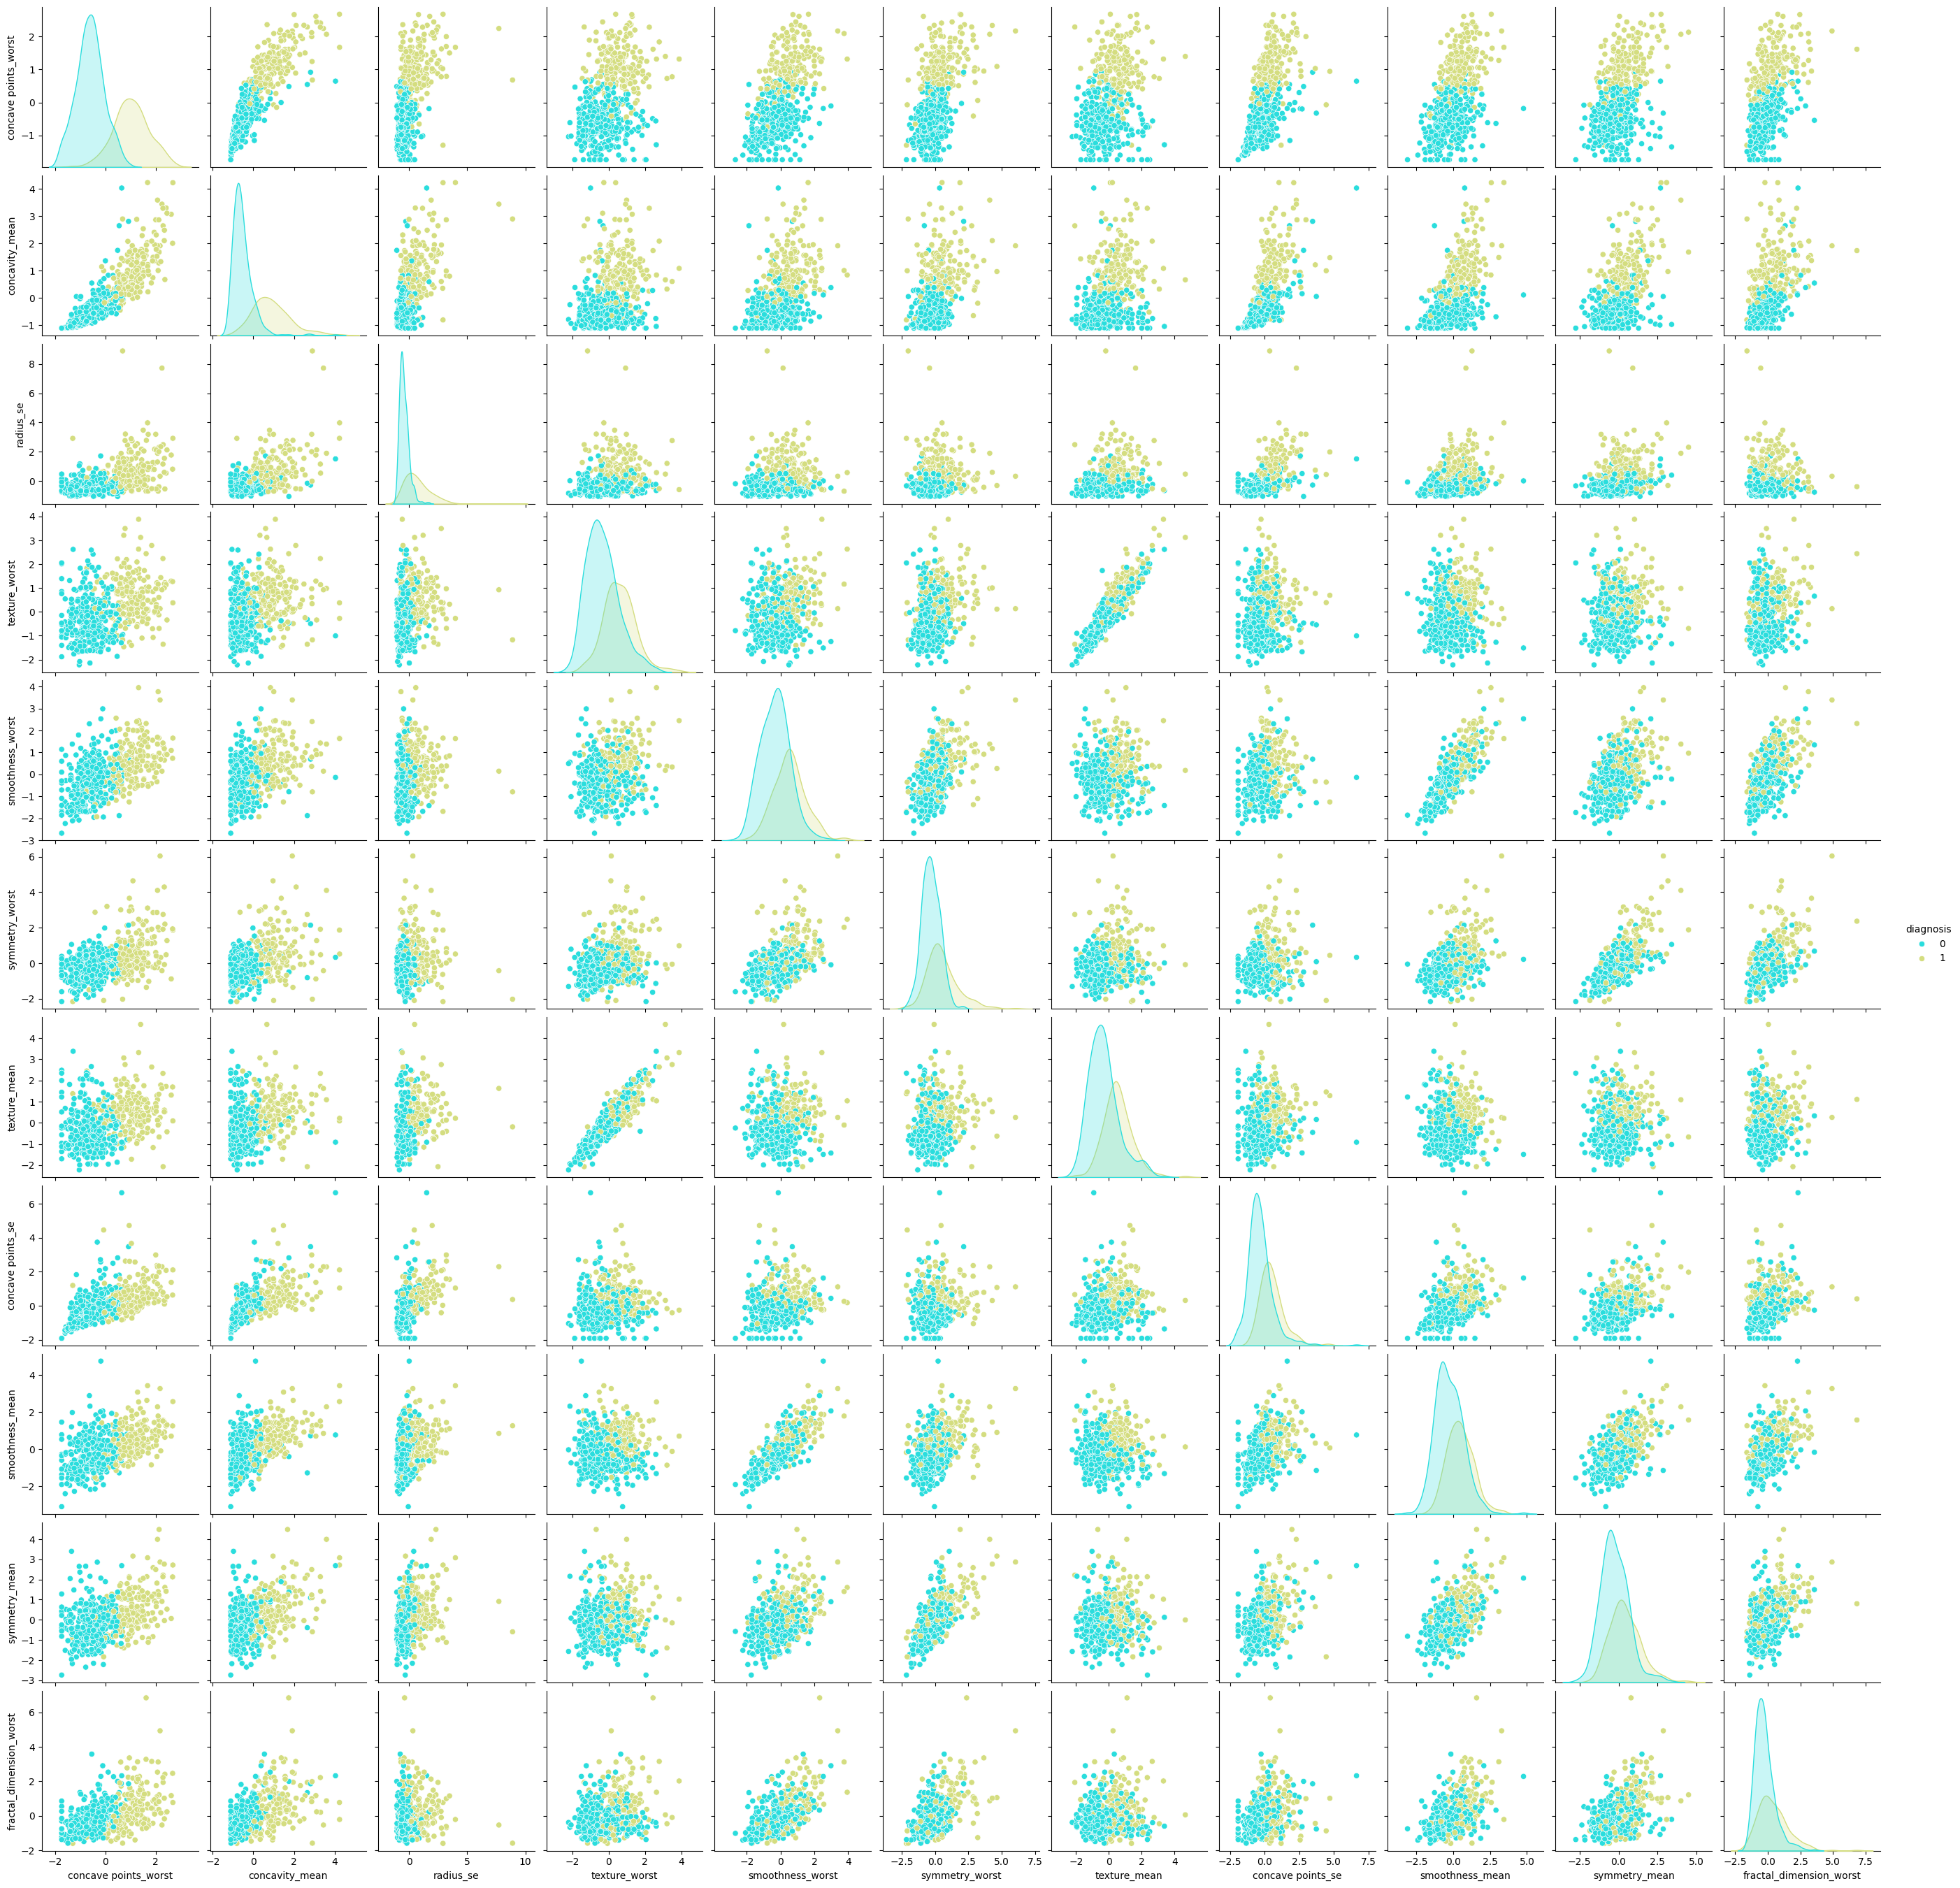

In [343]:
g = sns.pairplot(sel_feats_df,hue="diagnosis",palette="rainbow")
plt.savefig("Selected_Features_PairPlot.png")

# Generate Violin plots for the selected features
The violin plots compare the classes malignant and benign, they do this by showing not only the values from each feature bu also an estimate of the shape of their distribution


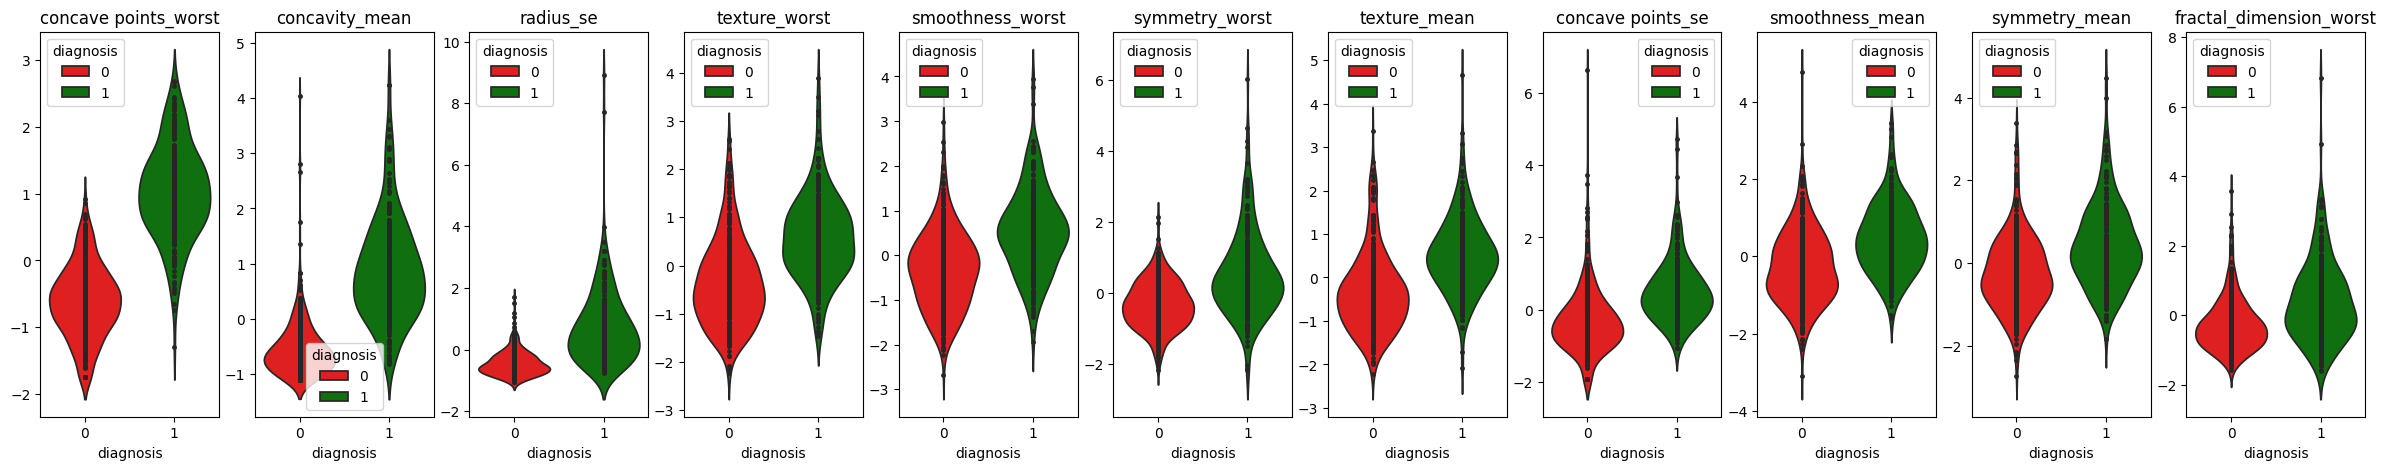

In [344]:
f, axes = plt.subplots(1, len(sel_feats_df.columns)-1, figsize=(30, 5))
for idx, feature_name in enumerate(sel_feats_df.columns):
    if feature_name!="diagnosis":
        g = sns.violinplot(data=sel_feats_df, x="diagnosis", y=feature_name, inner="points", hue="diagnosis", palette=['r','g'],ax=axes[idx])
        g.set(ylabel=None, title= feature_name);

plt.savefig("Selected_Features_ViolinPlot.png")